# Robust Testing Framework for PLI - Tutorial

This notebook demonstrates how to use the `robust_testing.py` module to comprehensively test your PLI (Probabilistic Linear Inference) pipeline. The goal is to **find scenarios where PLI breaks and understand failure modes**.

## What is Robust Testing?

Robust testing systematically runs your PLI pipeline across many different parameter combinations to:
- 🔍 **Find breaking points**: Identify parameter combinations that cause failures
- 📊 **Classify failures**: Understand what types of errors occur (numerical, memory, convergence, etc.)
- 🎯 **Locate bottlenecks**: See which stages of the pipeline fail most often
- 📈 **Performance insights**: Track execution times across different scenarios

## Table of Contents
1. [Setup and Basic Usage](#setup)
2. [Parameter Generation Strategies](#parameters)
3. [Running Single Tests](#single-test)
4. [Comprehensive Test Suites](#comprehensive)
5. [Failure Analysis](#analysis)
6. [Custom Test Scenarios](#custom)
7. [Best Practices](#best-practices)

## 1. Setup and Basic Usage {#setup}

Let's start by importing the robust testing framework and understanding its components.

In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the profiling directory to path (adjust as needed)
sys.path.append('pygeoinf/interval/profiling')

# Import robust testing framework
from robust_testing import (
    RobustTester,
    ParameterGenerator,
    TestResult,
    FailureType
)

print("✅ Robust testing framework imported successfully!")
print("\n📚 Available components:")
print("- RobustTester: Main testing orchestrator")
print("- ParameterGenerator: Creates diverse test scenarios")
print("- TestResult: Comprehensive test outcome tracking")
print("- FailureType: Classification of different failure modes")

✅ Robust testing framework imported successfully!

📚 Available components:
- RobustTester: Main testing orchestrator
- ParameterGenerator: Creates diverse test scenarios
- TestResult: Comprehensive test outcome tracking
- FailureType: Classification of different failure modes


### Understanding the Core Components

**`RobustTester`**: The main class that runs tests and analyzes results
- Handles timeouts and error recovery
- Classifies different types of failures
- Generates comprehensive reports

**`ParameterGenerator`**: Creates diverse parameter combinations
- Dimension sweeps (small to large problems)
- Noise level variations
- Prior configuration tests
- Pathological edge cases

**`TestResult`**: Stores comprehensive information about each test
- Success/failure status
- Execution time and memory usage
- Error classification and stage identification
- Complete stacktraces for debugging

## 2. Parameter Generation Strategies {#parameters}

The `ParameterGenerator` provides several strategies for creating test scenarios. Let's explore each one:

In [2]:
# Create a parameter generator
generator = ParameterGenerator()

print("🎯 Parameter Generation Strategies:")
print("\n1. Dimension Sweep - Tests different problem sizes")
print("2. Noise Sweep - Tests robustness to noise")
print("3. Prior Sweep - Tests different prior configurations")
print("4. Integration Sweep - Tests numerical integration settings")
print("5. Pathological Cases - Known problematic scenarios")

🎯 Parameter Generation Strategies:

1. Dimension Sweep - Tests different problem sizes
2. Noise Sweep - Tests robustness to noise
3. Prior Sweep - Tests different prior configurations
4. Integration Sweep - Tests numerical integration settings
5. Pathological Cases - Known problematic scenarios


In [3]:
# 1. Dimension Sweep - Test different problem sizes
dimension_configs = generator.generate_dimension_sweep()

print(f"📏 Dimension Sweep: {len(dimension_configs)} configurations")
print("\nExample configurations:")
for i, config in enumerate(dimension_configs[:5]):
    print(f"  {i+1}. N={config['N']}, N_d={config['N_d']}, N_p={config['N_p']}")

print("\n💡 This tests:")
print("  - Small problems (quick validation)")
print("  - Large problems (stress testing)")
print("  - Edge cases (minimal and maximal sizes)")

📏 Dimension Sweep: 54 configurations

Example configurations:
  1. N=5, N_d=10, N_p=5
  2. N=5, N_d=10, N_p=10
  3. N=5, N_d=20, N_p=5
  4. N=5, N_d=20, N_p=10
  5. N=5, N_d=20, N_p=15

💡 This tests:
  - Small problems (quick validation)
  - Large problems (stress testing)
  - Edge cases (minimal and maximal sizes)


In [4]:
# 2. Noise Sweep - Test robustness to different noise levels
noise_configs = generator.generate_noise_sweep()

print(f"🔊 Noise Sweep: {len(noise_configs)} configurations")
print("\nExample configurations:")
for i, config in enumerate(noise_configs[:5]):
    print(f"  {i+1}. True noise={config['true_data_noise']}, Assumed noise={config['assumed_data_noise']}")

print("\n💡 This tests:")
print("  - Very low noise (near-deterministic data)")
print("  - High noise (very uncertain data)")
print("  - Mismatched assumptions (true vs assumed noise)")

🔊 Noise Sweep: 25 configurations

Example configurations:
  1. True noise=0.001, Assumed noise=0.001
  2. True noise=0.001, Assumed noise=0.01
  3. True noise=0.001, Assumed noise=0.1
  4. True noise=0.001, Assumed noise=0.5
  5. True noise=0.001, Assumed noise=1.0

💡 This tests:
  - Very low noise (near-deterministic data)
  - High noise (very uncertain data)
  - Mismatched assumptions (true vs assumed noise)


In [5]:
# 3. Prior Sweep - Test different prior configurations
prior_configs = generator.generate_prior_sweep()

print(f"🎲 Prior Sweep: {len(prior_configs)} configurations")
print("\nExample configurations:")
for i, config in enumerate(prior_configs[:5]):
    print(f"  {i+1}. α={config['alpha']}, K={config['K']}")

print("\n💡 This tests:")
print("  - Very smooth priors (high α)")
print("  - Very rough priors (low α)")
print("  - Few vs many KL modes (K parameter)")

🎲 Prior Sweep: 25 configurations

Example configurations:
  1. α=0.001, K=5
  2. α=0.001, K=20
  3. α=0.001, K=50
  4. α=0.001, K=100
  5. α=0.001, K=500

💡 This tests:
  - Very smooth priors (high α)
  - Very rough priors (low α)
  - Few vs many KL modes (K parameter)


In [6]:
# 4. Integration Sweep - Test numerical integration settings
integration_configs = generator.generate_integration_sweep()

print(f"📐 Integration Sweep: {len(integration_configs)} configurations")
print("\nExample configurations:")
for i, config in enumerate(integration_configs[:3]):
    print(f"  {i+1}. Method G={config['integration_method_G']}, Method T={config['integration_method_T']}")
    print(f"      Points G={config['n_points_G']}, Points T={config['n_points_T']}")

print("\n💡 This tests:")
print("  - Different integration methods (trapz vs simpson)")
print("  - Various integration point densities")
print("  - Numerical accuracy vs computational cost trade-offs")

📐 Integration Sweep: 64 configurations

Example configurations:
  1. Method G=trapz, Method T=trapz
      Points G=50, Points T=50
  2. Method G=trapz, Method T=trapz
      Points G=50, Points T=100
  3. Method G=trapz, Method T=trapz
      Points G=50, Points T=500

💡 This tests:
  - Different integration methods (trapz vs simpson)
  - Various integration point densities
  - Numerical accuracy vs computational cost trade-offs


In [7]:
# 5. Pathological Cases - Known problematic scenarios
pathological_configs = generator.generate_pathological_cases()

print(f"⚠️  Pathological Cases: {len(pathological_configs)} configurations")
print("\nExample configurations:")
for i, config in enumerate(pathological_configs[:3]):
    print(f"  {i+1}. {config}")

print("\n💡 These are designed to break:")
print("  - Extreme noise mismatches")
print("  - Nearly singular prior covariances")
print("  - Insufficient data for problem size")
print("  - Dimension mismatches")

⚠️  Pathological Cases: 6 configurations

Example configurations:
  1. {'true_data_noise': 2.0, 'assumed_data_noise': 0.01}
  2. {'true_data_noise': 0.01, 'assumed_data_noise': 1.0}
  3. {'alpha': 0.0001}

💡 These are designed to break:
  - Extreme noise mismatches
  - Nearly singular prior covariances
  - Insufficient data for problem size
  - Dimension mismatches


## 3. Running Single Tests {#single-test}

Let's see how to run individual tests and understand the results.

In [32]:
from pygeoinf.linear_solvers import LUSolver
# First, let's define base parameters that should work
base_parameters = {
    'N': 20,                    # Model space dimension
    'N_d': 20,                  # Data space dimension
    'N_p': 5,                  # Number of properties
    'endpoints': (0, 1),        # Domain endpoints
    'basis_type': 'sine',       # Basis function type
    'integration_method_G': 'trapz',
    'integration_method_T': 'trapz',
    'n_points_G': 500,
    'n_points_T': 500,
    'alpha': 0.1,               # Prior smoothness
    'K': 50,                    # KL truncation
    'true_data_noise': 0.1,
    'assumed_data_noise': 0.1,
    'm_bar_callable': lambda x: np.sin(2 * np.pi * x),  # True function
    'm_0_callable': lambda x: np.zeros_like(x),         # Prior mean
    'solver': LUSolver()      # Linear solver
}

print("✅ Base parameters defined")
print(f"Problem size: N={base_parameters['N']}, N_d={base_parameters['N_d']}, N_p={base_parameters['N_p']}")
print(f"Prior: α={base_parameters['alpha']}, K={base_parameters['K']}")

✅ Base parameters defined
Problem size: N=20, N_d=20, N_p=5
Prior: α=0.1, K=50


In [33]:
# Create a robust tester
tester = RobustTester(timeout_seconds=60)  # 1 minute timeout per test

print("🧪 Running a single test with base parameters...")

# Run the test
result = tester.run_single_test(base_parameters)

# Display the results
print(f"\n📊 Test Result:")
print(f"Success: {'✅ YES' if result.success else '❌ NO'}")
print(f"Execution time: {result.execution_time:.3f} seconds")

if result.success:
    print(f"Warnings: {len(result.warnings)} warnings")
    if result.warnings:
        for warning in result.warnings:
            print(f"  ⚠️  {warning}")
    print("✅ Test completed successfully!")
else:
    print(f"Failure type: {result.failure_type.value if result.failure_type else 'Unknown'}")
    print(f"Failure stage: {result.failure_stage}")
    print(f"Error message: {result.error_message}")
    print("❌ Test failed - see error details above")

🧪 Running a single test with base parameters...
Executing setup_spatial_spaces...
Executing setup_mappings...
Executing _setup_truths_and_measurement...
Executing setup_prior_measure...
LaplacianInverseOperator initialized with native solver, dirichlet(left=0, right=0) BCs
Executing create_problems...
Executing compute_property_posterior...

📊 Test Result:
Success: ✅ YES
Execution time: 0.779 seconds
Warnings: 0 warnings
✅ Test completed successfully!


In [34]:
# Let's also test a problematic configuration to see what happens
problematic_params = base_parameters.copy()
problematic_params.update({
    'alpha': 0.00001,  # Nearly singular prior
    'N': 100,          # Large model space
    'N_d': 10,         # Very small data space
    'N_p': 50          # Too many measurements for data space
})

print("🧨 Testing problematic configuration:")
print(f"Very small α={problematic_params['alpha']} (nearly singular)")
print(f"N={problematic_params['N']}, N_d={problematic_params['N_d']}, N_p={problematic_params['N_p']}")

problematic_result = tester.run_single_test(problematic_params)

print(f"\n📊 Problematic Test Result:")
print(f"Success: {'✅ YES' if problematic_result.success else '❌ NO'}")
print(f"Execution time: {problematic_result.execution_time:.3f} seconds")

if not problematic_result.success:
    print(f"\n🔍 Failure Analysis:")
    print(f"Type: {problematic_result.failure_type.value if problematic_result.failure_type else 'Unknown'}")
    print(f"Stage: {problematic_result.failure_stage}")
    print(f"Error: {problematic_result.error_message}")
    print("\n💡 This shows how the framework captures and classifies failures!")

🧨 Testing problematic configuration:
Very small α=1e-05 (nearly singular)
N=100, N_d=10, N_p=50
Executing setup_spatial_spaces...
Executing setup_mappings...
Executing _setup_truths_and_measurement...
Executing setup_prior_measure...
LaplacianInverseOperator initialized with native solver, dirichlet(left=0, right=0) BCs
Executing create_problems...
Executing compute_property_posterior...

📊 Problematic Test Result:
Success: ❌ NO
Execution time: 3.160 seconds

🔍 Failure Analysis:
Type: unknown
Stage: compute_property_posterior
Error: Covariance matrix is not non-negative

💡 This shows how the framework captures and classifies failures!


## 4. Comprehensive Test Suites {#comprehensive}

Now let's run a comprehensive test suite to systematically explore the parameter space and find failure modes.

In [23]:
# Create a fresh tester for the comprehensive suite
comprehensive_tester = RobustTester(timeout_seconds=30)  # Shorter timeout for demo

print("🎯 Starting Comprehensive Test Suite")
print("This will test multiple categories of parameter variations...")
print("⏱️  Note: Using shorter timeout (30s) for demonstration")

# Run the comprehensive test suite
all_results = comprehensive_tester.run_comprehensive_test_suite(base_parameters)

print(f"\n✅ Comprehensive testing completed!")
print(f"Total tests run: {len(all_results)}")

🎯 Starting Comprehensive Test Suite
This will test multiple categories of parameter variations...
⏱️  Note: Using shorter timeout (30s) for demonstration
🧪 Starting Comprehensive PLI Test Suite...
Generated 46 test configurations
Running test 1/46...
Executing setup_spatial_spaces...
Executing setup_mappings...
Executing _setup_truths_and_measurement...
Executing setup_prior_measure...
LaplacianInverseOperator initialized with native solver, dirichlet(left=0, right=0) BCs
Executing create_problems...
Executing compute_property_posterior...
✅ SUCCESS: 0.48s
Running test 2/46...
Executing setup_spatial_spaces...
Executing setup_mappings...
Executing _setup_truths_and_measurement...
Executing setup_prior_measure...
LaplacianInverseOperator initialized with native solver, dirichlet(left=0, right=0) BCs
Executing create_problems...
Executing compute_property_posterior...
✅ SUCCESS: 0.78s
Running test 3/46...
Executing setup_spatial_spaces...
Executing setup_mappings...
Executing _setup_trut

In [24]:
# Quick summary of results
successful_tests = [r for r in all_results if r.success]
failed_tests = [r for r in all_results if not r.success]

print(f"📊 Quick Summary:")
print(f"✅ Successful tests: {len(successful_tests)} ({len(successful_tests)/len(all_results)*100:.1f}%)")
print(f"❌ Failed tests: {len(failed_tests)} ({len(failed_tests)/len(all_results)*100:.1f}%)")

if successful_tests:
    execution_times = [r.execution_time for r in successful_tests]
    print(f"\n⏱️  Execution Time Stats (successful tests):")
    print(f"  Average: {np.mean(execution_times):.3f}s")
    print(f"  Fastest: {np.min(execution_times):.3f}s")
    print(f"  Slowest: {np.max(execution_times):.3f}s")

if failed_tests:
    print(f"\n🔍 Failure Preview:")
    failure_types = [r.failure_type.value if r.failure_type else 'unknown' for r in failed_tests]
    unique_failures = list(set(failure_types))
    print(f"  Types of failures encountered: {unique_failures}")

📊 Quick Summary:
✅ Successful tests: 27 (58.7%)
❌ Failed tests: 19 (41.3%)

⏱️  Execution Time Stats (successful tests):
  Average: 1.975s
  Fastest: 0.473s
  Slowest: 3.142s

🔍 Failure Preview:
  Types of failures encountered: ['unknown']


## 5. Failure Analysis {#analysis}

The most valuable part of robust testing is understanding **why** and **where** things fail. Let's generate a detailed failure report.

In [25]:
# Generate comprehensive failure report
failure_report = comprehensive_tester.generate_failure_report()

print("📋 COMPREHENSIVE FAILURE ANALYSIS REPORT")
print("="*50)

# Overall summary
summary = failure_report['summary']
print(f"\n📊 Overall Results:")
print(f"  Total tests: {summary['total_tests']}")
print(f"  Successful: {summary['successes']} ({summary['success_rate']*100:.1f}%)")
print(f"  Failed: {summary['failures']} ({(1-summary['success_rate'])*100:.1f}%)")

# Failure type analysis
failure_analysis = failure_report['failure_analysis']
print(f"\n🔍 Failure Types:")
for failure_type, count in failure_analysis['by_type'].items():
    percentage = (count / summary['failures'] * 100) if summary['failures'] > 0 else 0
    print(f"  {failure_type}: {count} cases ({percentage:.1f}%)")

# Failure stage analysis
print(f"\n🎯 Failure Stages:")
for stage, count in failure_analysis['by_stage'].items():
    percentage = (count / summary['failures'] * 100) if summary['failures'] > 0 else 0
    print(f"  {stage}: {count} cases ({percentage:.1f}%)")

# Performance analysis
performance = failure_report['performance']
print(f"\n⚡ Performance (successful tests):")
print(f"  Average time: {performance['avg_success_time']:.3f}s")
print(f"  Fastest: {performance['min_success_time']:.3f}s")
print(f"  Slowest: {performance['max_success_time']:.3f}s")

📋 COMPREHENSIVE FAILURE ANALYSIS REPORT

📊 Overall Results:
  Total tests: 46
  Successful: 27 (58.7%)
  Failed: 19 (41.3%)

🔍 Failure Types:
  unknown: 19 cases (100.0%)

🎯 Failure Stages:
  compute_property_posterior: 18 cases (94.7%)
  _setup_truths_and_measurement: 1 cases (5.3%)

⚡ Performance (successful tests):
  Average time: 1.975s
  Fastest: 0.473s
  Slowest: 3.142s


In [26]:
# Let's look at specific failure examples to understand patterns
failed_tests = [r for r in all_results if not r.success]

if failed_tests:
    print("🔬 DETAILED FAILURE EXAMPLES")
    print("="*40)

    # Group failures by type
    failures_by_type = {}
    for failure in failed_tests:
        ftype = failure.failure_type.value if failure.failure_type else 'unknown'
        if ftype not in failures_by_type:
            failures_by_type[ftype] = []
        failures_by_type[ftype].append(failure)

    # Show examples of each failure type
    for failure_type, failures in failures_by_type.items():
        print(f"\n❌ {failure_type.upper()} ({len(failures)} cases):")

        # Show first example
        example = failures[0]
        print(f"  Example parameters:")
        key_params = ['N', 'N_d', 'N_p', 'alpha', 'K', 'true_data_noise']
        for param in key_params:
            if param in example.parameters:
                print(f"    {param}: {example.parameters[param]}")

        print(f"  Failed at: {example.failure_stage}")
        print(f"  Error: {example.error_message[:100]}...")

        # Common patterns in this failure type
        if len(failures) > 1:
            alphas = [f.parameters.get('alpha', 'N/A') for f in failures if 'alpha' in f.parameters]
            if alphas:
                print(f"  α range in failures: {min(alphas):.4f} - {max(alphas):.4f}")
else:
    print("🎉 No failures to analyze - all tests passed!")

🔬 DETAILED FAILURE EXAMPLES

❌ UNKNOWN (19 cases):
  Example parameters:
    N: 5
    N_d: 20
    N_p: 15
    alpha: 0.1
    K: 50
    true_data_noise: 0.1
  Failed at: compute_property_posterior
  Error: Covariance matrix is not non-negative...
  α range in failures: 0.0100 - 1000.0000


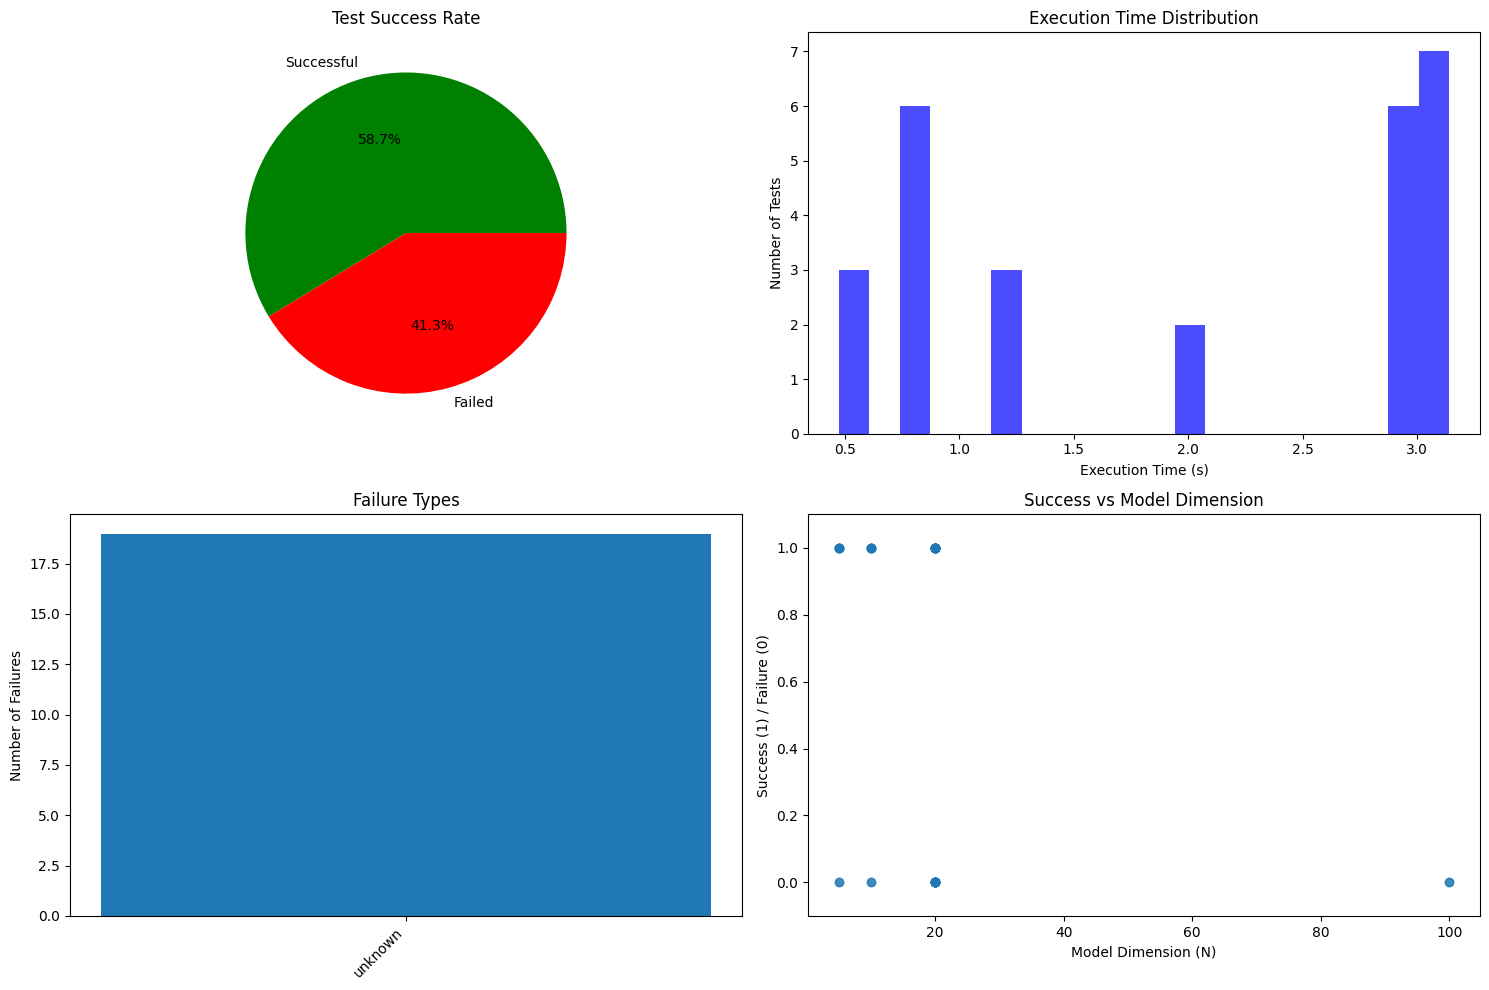

📊 Visualization complete! Key insights:
  - Success rate shows overall robustness
  - Execution time distribution shows performance consistency
  - Failure types help identify main problem areas
  - Parameter correlations reveal problematic ranges


In [27]:
# Visualize the results
if len(all_results) > 0:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Success vs Failure pie chart
    success_counts = [len(successful_tests), len(failed_tests)]
    labels = ['Successful', 'Failed']
    colors = ['green', 'red']
    ax1.pie(success_counts, labels=labels, colors=colors, autopct='%1.1f%%')
    ax1.set_title('Test Success Rate')

    # 2. Execution time distribution
    if successful_tests:
        times = [r.execution_time for r in successful_tests]
        ax2.hist(times, bins=min(20, len(times)), alpha=0.7, color='blue')
        ax2.set_xlabel('Execution Time (s)')
        ax2.set_ylabel('Number of Tests')
        ax2.set_title('Execution Time Distribution')

    # 3. Failure types breakdown
    if failed_tests:
        failure_types = [r.failure_type.value if r.failure_type else 'unknown' for r in failed_tests]
        unique_types, counts = np.unique(failure_types, return_counts=True)
        ax3.bar(range(len(unique_types)), counts)
        ax3.set_xticks(range(len(unique_types)))
        ax3.set_xticklabels(unique_types, rotation=45, ha='right')
        ax3.set_ylabel('Number of Failures')
        ax3.set_title('Failure Types')

    # 4. Parameter correlation (example: N vs success)
    N_values = [r.parameters.get('N', 0) for r in all_results]
    success_flags = [1 if r.success else 0 for r in all_results]

    ax4.scatter(N_values, success_flags, alpha=0.6)
    ax4.set_xlabel('Model Dimension (N)')
    ax4.set_ylabel('Success (1) / Failure (0)')
    ax4.set_title('Success vs Model Dimension')
    ax4.set_ylim(-0.1, 1.1)

    plt.tight_layout()
    plt.show()

    print("📊 Visualization complete! Key insights:")
    print("  - Success rate shows overall robustness")
    print("  - Execution time distribution shows performance consistency")
    print("  - Failure types help identify main problem areas")
    print("  - Parameter correlations reveal problematic ranges")
else:
    print("⚠️  No results to visualize")

## 6. Custom Test Scenarios {#custom}

You can also create your own custom test scenarios for specific research questions or problem domains.

In [28]:
# Example: Test how the system behaves with different basis functions
def create_basis_function_tests(base_params):
    """Create tests for different basis function types"""

    test_configs = []

    # Test different basis types
    basis_types = ['sine', 'fourier']

    # Test different problem sizes with each basis
    problem_sizes = [(10, 20, 8), (50, 100, 25), (100, 200, 50)]

    for basis_type in basis_types:
        for N, N_d, N_p in problem_sizes:
            config = base_params.copy()
            config.update({
                'basis_type': basis_type,
                'N': N,
                'N_d': N_d,
                'N_p': N_p
            })
            test_configs.append(config)

    return test_configs

# Generate custom test scenarios
basis_tests = create_basis_function_tests(base_parameters)

print(f"🎨 Created {len(basis_tests)} custom basis function tests")
print("\nExample configurations:")
for i, config in enumerate(basis_tests[:4]):
    print(f"  {i+1}. Basis: {config['basis_type']}, N={config['N']}, N_d={config['N_d']}, N_p={config['N_p']}")

🎨 Created 6 custom basis function tests

Example configurations:
  1. Basis: sine, N=10, N_d=20, N_p=8
  2. Basis: sine, N=50, N_d=100, N_p=25
  3. Basis: sine, N=100, N_d=200, N_p=50
  4. Basis: fourier, N=10, N_d=20, N_p=8


In [29]:
# Run the custom basis function tests
custom_tester = RobustTester(timeout_seconds=30)

print("🧪 Running custom basis function tests...")

custom_results = []
for i, config in enumerate(basis_tests):
    print(f"Test {i+1}/{len(basis_tests)}: {config['basis_type']} basis, N={config['N']}")
    result = custom_tester.run_single_test(config)
    custom_results.append(result)

    if result.success:
        print(f"  ✅ Success ({result.execution_time:.3f}s)")
    else:
        print(f"  ❌ Failed: {result.failure_type.value if result.failure_type else 'unknown'}")

print(f"\n📊 Custom Test Results:")
custom_successes = [r for r in custom_results if r.success]
custom_failures = [r for r in custom_results if not r.success]
print(f"Success rate: {len(custom_successes)/len(custom_results)*100:.1f}%")

🧪 Running custom basis function tests...
Test 1/6: sine basis, N=10
Executing setup_spatial_spaces...
Executing setup_mappings...
Executing _setup_truths_and_measurement...
Executing setup_prior_measure...
LaplacianInverseOperator initialized with native solver, dirichlet(left=0, right=0) BCs
Executing create_problems...
Executing compute_property_posterior...
  ✅ Success (1.087s)
Test 2/6: sine basis, N=50
Executing setup_spatial_spaces...
Executing setup_mappings...
Executing _setup_truths_and_measurement...
Executing setup_prior_measure...
LaplacianInverseOperator initialized with native solver, dirichlet(left=0, right=0) BCs
Executing create_problems...
Executing compute_property_posterior...
  ❌ Failed: unknown
Test 3/6: sine basis, N=100
Executing setup_spatial_spaces...
Executing setup_mappings...
Executing _setup_truths_and_measurement...
Executing setup_prior_measure...
LaplacianInverseOperator initialized with native solver, dirichlet(left=0, right=0) BCs
Executing create_pro

In [30]:
# Analyze basis function performance comparison
if custom_successes:
    # Group by basis type
    sine_results = [r for r in custom_successes if r.parameters['basis_type'] == 'sine']
    fourier_results = [r for r in custom_successes if r.parameters['basis_type'] == 'fourier']

    print("⚖️  Basis Function Performance Comparison:")

    if sine_results:
        sine_times = [r.execution_time for r in sine_results]
        print(f"\nSine basis ({len(sine_results)} successful tests):")
        print(f"  Average time: {np.mean(sine_times):.3f}s")
        print(f"  Range: {np.min(sine_times):.3f}s - {np.max(sine_times):.3f}s")

    if fourier_results:
        fourier_times = [r.execution_time for r in fourier_results]
        print(f"\nFourier basis ({len(fourier_results)} successful tests):")
        print(f"  Average time: {np.mean(fourier_times):.3f}s")
        print(f"  Range: {np.min(fourier_times):.3f}s - {np.max(fourier_times):.3f}s")

    # Simple comparison
    if sine_results and fourier_results:
        sine_avg = np.mean([r.execution_time for r in sine_results])
        fourier_avg = np.mean([r.execution_time for r in fourier_results])

        faster_basis = "Sine" if sine_avg < fourier_avg else "Fourier"
        speedup = max(sine_avg, fourier_avg) / min(sine_avg, fourier_avg)

        print(f"\n🏆 {faster_basis} basis is {speedup:.2f}x faster on average")
else:
    print("⚠️  No successful custom tests to analyze")

⚖️  Basis Function Performance Comparison:

Sine basis (1 successful tests):
  Average time: 1.087s
  Range: 1.087s - 1.087s

Fourier basis (1 successful tests):
  Average time: 1.019s
  Range: 1.019s - 1.019s

🏆 Fourier basis is 1.07x faster on average


## 7. Best Practices {#best-practices}

Here are some best practices for effective robust testing:

### 🎯 Testing Strategy Best Practices

**1. Start Small, Scale Up**
- Begin with small problem sizes to quickly identify obvious issues
- Gradually increase complexity to find scaling limits
- Use timeouts to prevent infinite loops in large problems

**2. Systematic Parameter Exploration**
- Test each parameter dimension independently first
- Then test combinations of problematic parameters
- Include edge cases and boundary conditions

**3. Document and Classify Failures**
- Always record the complete error context
- Classify failures by type for pattern recognition
- Track which pipeline stage fails most often

**4. Performance Monitoring**
- Track execution times across parameter ranges
- Monitor memory usage for large problems
- Identify performance cliffs and bottlenecks

**5. Iterative Improvement**
- Use failure analysis to guide code improvements
- Re-run tests after fixes to verify improvements
- Build regression test suites from discovered issues

In [31]:
# Example: Create a focused test suite based on previous failures
def create_focused_test_suite(previous_failures):
    """Create targeted tests based on previous failure analysis"""

    focused_tests = []

    # If numerical instability was common, test around those parameters
    numerical_failures = [f for f in previous_failures
                         if f.failure_type == FailureType.NUMERICAL_INSTABILITY]

    if numerical_failures:
        print("🎯 Creating focused tests for numerical instability...")

        # Test a range around problematic alpha values
        problematic_alphas = [f.parameters.get('alpha', 0.1) for f in numerical_failures
                             if 'alpha' in f.parameters]

        if problematic_alphas:
            min_alpha = min(problematic_alphas)
            max_alpha = max(problematic_alphas)

            # Test around this range with different problem sizes
            test_alphas = np.logspace(np.log10(min_alpha), np.log10(max_alpha), 5)

            for alpha in test_alphas:
                for N in [10, 20, 50]:  # Different sizes
                    config = base_parameters.copy()
                    config.update({
                        'alpha': alpha,
                        'N': N,
                        'N_d': N * 2,
                        'N_p': N // 2
                    })
                    focused_tests.append(config)

    return focused_tests

# Example usage (would use actual previous failures)
if failed_tests:
    focused_suite = create_focused_test_suite(failed_tests)
    print(f"📍 Created {len(focused_suite)} focused tests based on previous failures")

    # You could run these for deeper analysis:
    # focused_results = [custom_tester.run_single_test(config) for config in focused_suite]
else:
    print("✅ No previous failures to focus on - great job!")

📍 Created 0 focused tests based on previous failures


## Summary and Next Steps

You now know how to use the robust testing framework to:

✅ **Generate diverse test scenarios** using `ParameterGenerator`
✅ **Run comprehensive test suites** with `RobustTester` 
✅ **Analyze failure patterns** and classify error types
✅ **Create custom test scenarios** for specific research questions
✅ **Monitor performance** across parameter ranges
✅ **Visualize results** to understand robustness patterns

### 🚀 Recommended Workflow:

1. **Start with a known-good configuration**
2. **Run dimension sweeps** to find scaling limits
3. **Test noise robustness** for your application domain
4. **Explore prior sensitivity** around your typical settings
5. **Include pathological cases** to test error handling
6. **Analyze failures systematically** to guide improvements
7. **Create focused test suites** for problematic areas
8. **Document and share findings** with your research team

### 🔧 Integration with Your Research:

- Use robust testing **before production runs** to avoid wasted computation
- **Automate testing** as part of your development workflow
- **Track performance** trends as you modify algorithms
- **Share failure patterns** to improve the underlying PLI implementation

The robust testing framework helps you answer: *"When does my PLI pipeline break, and why?"* - crucial knowledge for reliable scientific computing!